In [1]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()


,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


**Renomear colunas**

In [2]:
renomeanddo_colunas = {
        'unfinished': 'inacabado',
       'expected_hours': 'horas_esperadas',
       'price':'preco'}
dados = dados.rename(columns = renomeanddo_colunas)



In [3]:
dados.head()

,inacabado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


**Invertendo os dados**

In [4]:
troca = {
    0:1,
    1:0
}
dados['finalizado'] = dados.inacabado.map(troca)
dados.head(20)

,inacabado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0
5,1,33,173,0
6,1,64,1965,0
7,1,99,1993,0
8,1,45,278,0
9,0,96,12479,1


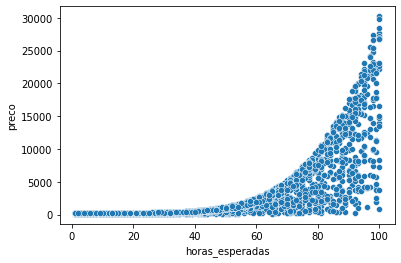

In [5]:
import seaborn as sns
sns.scatterplot(x="horas_esperadas", y = "preco", data=dados)

**Projetos não finalizados em azul = 0 , e projetos finalizdos em laranja = 1**

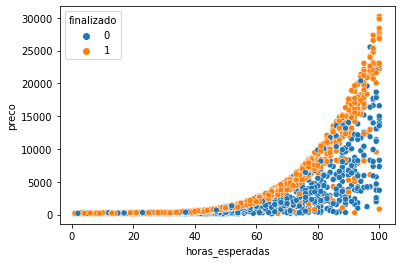

In [6]:
sns.scatterplot(x='horas_esperadas', y = 'preco', hue= 'finalizado', data=dados)

**Gerando dois graficos diferntes 0 não finalizados e o 1 que foi finalizado**

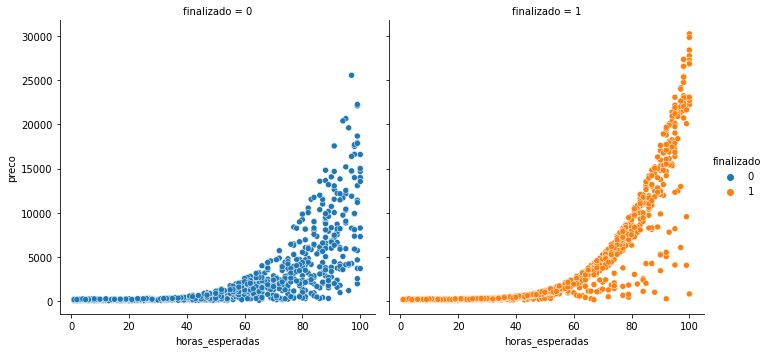

In [7]:
sns.relplot(x='horas_esperadas', y = 'preco', col= 'finalizado',hue= 'finalizado', data=dados)

In [8]:
 x =  dados[['horas_esperadas', 'preco']]
 y = dados['finalizado']

## **Usando a Biblioteca para separar o treino e teste, criando o modelo linear, treinando o modelo, prevendo e testando a acuracia**

In [9]:
import numpy as np



In [22]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print(treino_x.shape)
print(teste_x.shape)



print("Treinaremos com %d elemntos e testaremos com %d elementos" % (len(treino_x),len(teste_x)))


modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia  foi %.2f%%" % acuracia)

(1617, 2)
(540, 2)
Treinaremos com 1617 elemntos e testaremos com 540 elementos
A acurácia  foi 55.19%


In [11]:
previsoes = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes)*100
print("A acurácia  foi %.2f%%" % acuracia)

A acurácia  foi 52.59%


**Analise visual**

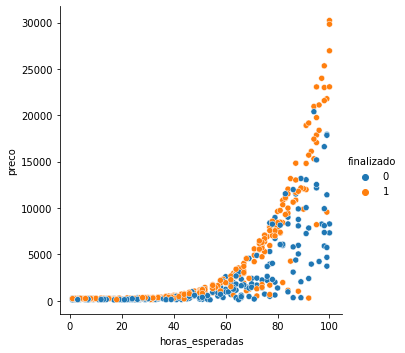

In [12]:
sns.relplot(x='horas_esperadas', y = 'preco',hue= teste_y, data=teste_x)

In [13]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max,y_min,y_max)


1 100 100 30223


In [14]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/pixels)


In [15]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [16]:
z= modelo.predict(pontos)
z= z.reshape(xx.shape)
z

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

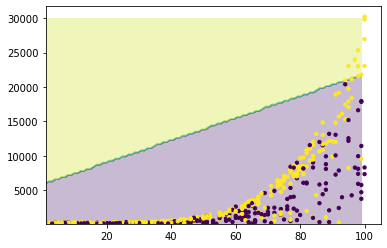

In [17]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s= 11)

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


SEED = 5
np.random.seed(SEED)

cru_treino_x, cru_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print(treino_x.shape)
print(teste_x.shape)



print("Treinaremos com %d elemntos e testaremos com %d elementos" % (len(treino_x),len(teste_x)))

scaler = StandardScaler()
scaler.fit(cru_treino_x)
treino_x = scaler.transform(cru_treino_x)
teste_x = scaler.transform(cru_teste_x)


modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia  foi %.2f%%" % acuracia)

(1617, 2)
(540, 2)
Treinaremos com 1617 elemntos e testaremos com 540 elementos
A acurácia  foi 66.85%


-1.7348767953644189 1.7418048354450535 -0.5962799114048444 5.406738368968601


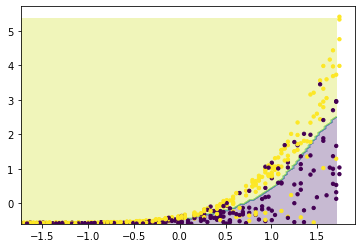

In [33]:
data_x = teste_x[:,0]
data_y =  teste_x[:,1]


x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()
print(x_min, x_max,y_min,y_max)

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

z= modelo.predict(pontos)
z= z.reshape(xx.shape)
z

import matplotlib.pyplot as plt

plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(data_x,data_y, c=teste_y, s= 11)

**Oqeue foi visto**

**Trocar valores;**

**Usar a biblioteca seaborn;**

**Gerar um gráfico com dados do CSV;**

**Definir cores no gráfico;**

**Gerar gráficos distintos;**

**Criação de um algoritmo base;**

**Capturar os valores mínimos e máximos.**

**Utilizar a função arange do numpy**

**Utilizar o módulo Support Vector Machine;**

**Gerar valores randômicos com o módulo SVC;**

**Utilizar o módulo Standard Scale.**